In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence
import keras
import os
import tensorflow as tf
import numpy as np
#import streamlit as st
from tensorflow.keras.saving import register_keras_serializable
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:

from google.colab import files

files.upload()

Saving smile.jpg to smile.jpg
Saving sad.png to sad.png


{'smile.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00VExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x04\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00>\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00F\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01,\x00\x00\x00\x01\x00\x00\x01,\x00\x00\x00\x01\xff\xed\x00,Photoshop 3.0\x008BIM\x04\x04\x00\x00\x00\x00\x00\x0f\x1c\x01Z\x00\x03\x1b%G\x1c\x01\x00\x00\x02\x00\x04\x00\xff\xe1\x0c\x81http://ns.adobe.com/xap/1.0/\x00<?xpacket begin=\'\xef\xbb\xbf\' id=\'W5M0MpCehiHzreSzNTczkc9d\'?>\n<x:xmpmeta xmlns:x=\'adobe:ns:meta/\' x:xmptk=\'Image::ExifTool 10.10\'>\n<rdf:RDF xmlns:rdf=\'http://www.w3.org/1999/02/22-rdf-syntax-ns#\'>\n\n <rdf:Description rdf:about=\'\'\n  xmlns:tiff=\'http://ns.adobe.com/tiff/1.0/\'>\n  <tiff:ResolutionUnit>2</tiff:ResolutionUnit>\n  <tiff:XResolution>300/1</tiff:XResolution>\n  <tiff:YResolution>300/1</tiff:YResolution>\n </r

# Sentiments analysis

In [5]:
VOCAB_SIZE = 88584

MAXLEN = 250
BATCH_SIZE = 64

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = VOCAB_SIZE)

In [6]:
# Lets look at one review
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 23141,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 36893,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 25249,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 46151,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 

In [7]:
train_data = sequence.pad_sequences(train_data, MAXLEN)
test_data = sequence.pad_sequences(test_data, MAXLEN)

## RNN

In [ ]:
# Modèle RNN
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32, input_length=MAXLEN),
    tf.keras.layers.SimpleRNN(32, return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_rnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model_rnn.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - acc: 0.6072 - loss: 0.6359 - val_acc: 0.8106 - val_loss: 0.4241
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - acc: 0.8310 - loss: 0.4021 - val_acc: 0.8432 - val_loss: 0.3666
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - acc: 0.8959 - loss: 0.2623 - val_acc: 0.8360 - val_loss: 0.3781
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 76ms/step - acc: 0.9269 - loss: 0.1941 - val_acc: 0.7996 - val_loss: 0.4925
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - acc: 0.9566 - loss: 0.1214 - val_acc: 0.8394 - val_loss: 0.4490
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 81ms/step - acc: 0.9759 - loss: 0.0739 - val_acc: 0.8172 - val_loss: 0.5464
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - acc: 0.9861 - loss: 0.0423 - val_acc: 0.7664 - val_loss: 0.7433
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 83ms/step - acc: 0.9918 - loss: 0.0274 - val_acc: 0.8026 - val_loss: 0.7307
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
with open('model_rnn.pkl', 'wb') as f:
    pickle.dump(model_rnn, f)

files.download('model_rnn.pkl')

In [ ]:
#model_rnn=tf.keras.models.load_model('model_rnn.pkl')
from google.colab import files
import pickle
# Charger le fichier .pkl
with open('model_rnn.pkl', 'rb') as f:
    model_rnn = pickle.load(f)

# Vérifier le type de l'objet chargé
print(type(model_rnn))

<class 'keras.src.models.sequential.Sequential'>


In [ ]:
results_rnn = model_rnn.evaluate(test_data, test_labels)
print(results_rnn)

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - acc: 0.8088 - loss: 0.8266
[0.826721727848053, 0.8083199858665466]


In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  

In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]

print(decode_integers(encoded))

that movie was just amazing so amazing


In [ ]:
# now time to make a prediction

def predict(model,text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred)
  print(result[0])

positive_review = "it was amazingly very great"
predict(model_rnn,positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again."
predict(model_rnn,negative_review)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
[0.9949482]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[0.06237121]


In [ ]:
text=input("Enter your review: \n")
predict(model_rnn,text)

Enter your review: 
very happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[0.02142405]


## LSTM

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_lstm.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['acc'])

history = model_lstm.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 113ms/step - acc: 0.6896 - loss: 0.5593 - val_acc: 0.8594 - val_loss: 0.3320
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - acc: 0.8887 - loss: 0.2846 - val_acc: 0.8730 - val_loss: 0.3016
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 110ms/step - acc: 0.9162 - loss: 0.2228 - val_acc: 0.8774 - val_loss: 0.2936
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 125ms/step - acc: 0.9369 - loss: 0.1787 - val_acc: 0.8684 - val_loss: 0.3080
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - acc: 0.9467 - loss: 0.1529 - val_acc: 0.8832 - val_loss: 0.3559
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - acc: 0.9560 - loss: 0.1312 - val_acc: 0.8786 - val_loss: 0.3041
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 114ms/step - acc: 0.9646 - loss: 0.1092 - val_acc: 0.8874 - val_loss: 0.3283
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 124ms/step - acc: 0.9689 - loss: 0.0925 - val_acc: 0.8836 - val_loss: 0.3588
Epoch 9/10
625/625 ━━━━━━━━━━━━━

In [ ]:
from google.colab import files
import pickle

with open('model_lstm.pkl', 'wb') as f:
    pickle.dump(model_lstm, f)

files.download('model_lstm.pkl')

In [ ]:
# Charger le fichier model_lstm.pkl
with open('model_lstm.pkl', 'rb') as f:
    model_lstm = pickle.load(f)

# Vérifier le type de l'objet chargé
print(type(model_lstm))

<class 'keras.src.models.sequential.Sequential'>


In [ ]:
results_lstm = model_lstm.evaluate(test_data, test_labels)
print(results_lstm)

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - acc: 0.8599 - loss: 0.4689
[0.46708691120147705, 0.8599600195884705]


In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12  17  13  4

In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]

print(decode_integers(encoded))

that movie was just amazing so amazing


In [ ]:
# now time to make a prediction

def predict(model,text):
  encoded_text = encode_text(text)
  pred = np.zeros((1,250))
  pred[0] = encoded_text
  result = model.predict(pred)
  print(result[0])

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(model_lstm,positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(model_lstm,negative_review)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
[0.9041555]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0.03734026]


In [ ]:
text=input("Enter your review: ")
predict(model_lstm,text)

Enter your review: very good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
[0.83986473]



## LSTM Avec Attention

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


@keras.saving.register_keras_serializable()
class AttentionLayer(Layer):
    def __init__(self, units, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        # input_shape = (batch_size, time_steps, features)
        self.W = self.add_weight(name="att_weight",
                                 shape=(input_shape[-1], self.units),
                                 initializer="random_normal",
                                 trainable=True)
        self.b = self.add_weight(name="att_bias",
                                 shape=(self.units,),
                                 initializer="zeros",
                                 trainable=True)
        self.u = self.add_weight(name="att_u",
                                 shape=(self.units, 1),
                                 initializer="random_normal",
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
      score = K.tanh(K.dot(inputs, self.W) + self.b)
      attention_weights = K.softmax(K.dot(score, self.u), axis=1)
      context_vector = attention_weights * inputs
      context_vector = K.sum(context_vector, axis=1)
      return context_vector, attention_weights

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])


In [ ]:
from tensorflow.keras import regularizers

model_lstm_attention = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64, input_length=MAXLEN),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True,
                             kernel_regularizer=regularizers.l2(0.0005))
    ),
    tf.keras.layers.Dropout(0.2),
    AttentionLayer(units=64),  # Teste aussi avec 128 pour comparer
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Résumé du modèle
model_lstm_attention.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer_4 (AttentionLayer)   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_lstm_attention.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["acc"])

In [ ]:
# Entraînement du modèle
history = model_lstm_attention.fit(train_data, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 342ms/step - acc: 0.5316 - loss: 0.7393 - val_acc: 0.8116 - val_loss: 0.4353
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 371ms/step - acc: 0.8423 - loss: 0.3808 - val_acc: 0.8068 - val_loss: 0.4450
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 215s 344ms/step - acc: 0.9003 - loss: 0.2502 - val_acc: 0.8338 - val_loss: 0.4041
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 270s 356ms/step - acc: 0.9339 - loss: 0.1880 - val_acc: 0.8944 - val_loss: 0.2721
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 354ms/step - acc: 0.9504 - loss: 0.1463 - val_acc: 0.8306 - val_loss: 0.4331
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 256s 344ms/step - acc: 0.9606 - loss: 0.1177 - val_acc: 0.8658 - val_loss: 0.4052
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 261s 342ms/step - acc: 0.9709 - loss: 0.0938 - val_acc: 0.8830 - val_loss: 0.3295
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 339ms/step - acc: 0.9776 - loss: 0.0772 - val_acc: 0.8666 - val_loss: 0.4144
Epoch 9/10
625/625 ━━━━━

In [ ]:
from tensorflow.keras.models import save_model

model_lstm_attention.save("model_lstm_attention.h5")



In [ ]:
from google.colab import files

files.download("model_lstm_attention.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model_lstm_attention1 = load_model("model_lstm_attention.h5", custom_objects={"AttentionLayer": AttentionLayer})


In [ ]:
results_lstm_attention = model_lstm_attention.evaluate(test_data, test_labels)
print("Résultats du modèle LSTM avec attention :", results_lstm_attention)

782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - acc: 0.8628 - loss: 0.5233
Résultats du modèle LSTM avec attention : [0.5147583484649658, 0.8629599809646606]


In [ ]:
word_index = imdb.get_word_index()

def encode_text(text):
  tokens = tf.keras.preprocessing.text.text_to_word_sequence(text)
  tokens = [word_index[word] if word in word_index else 0 for word in tokens]
  return sequence.pad_sequences([tokens], MAXLEN)[0]

text = "that movie was just amazing, so amazing"
encoded = encode_text(text)
print(encoded)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  12  17  13  4

In [ ]:
# while were at it lets make a decode function

reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_integers(integers):
    PAD = 0
    text = ""
    for num in integers:
      if num != PAD:
        text += reverse_word_index[num] + " "

    return text[:-1]

print(decode_integers(encoded))

that movie was just amazing so amazing


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
[0.9676099]


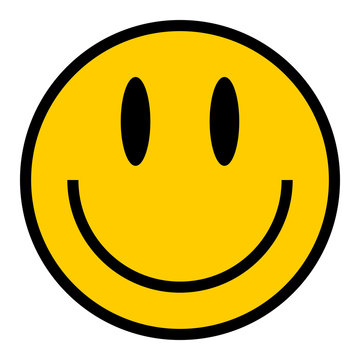

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[0.19224057]


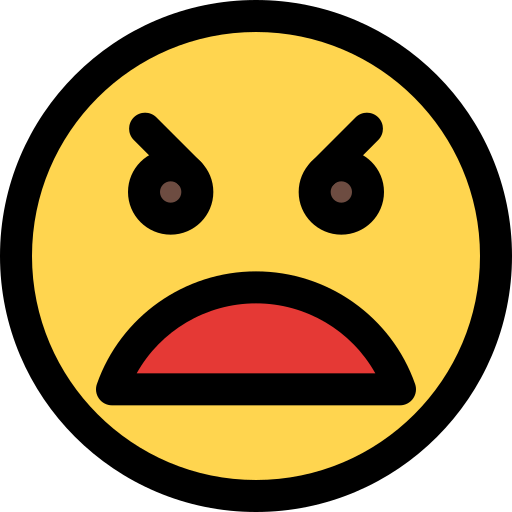

In [ ]:
# now time to make a prediction
from IPython.display import Image, display

def predict(model,text):
  encoded_text = encode_text(text)
  # On s'assure que la forme du tableau correspond à (1, MAXLEN)
  pred = np.reshape(encoded_text, (1, MAXLEN))
  result = model.predict(pred)
  print(result[0])
  if result[0] > 0.5:
      display(Image('/content/smile.jpg',width=100,height=100))
  else:
      display(Image('/content/sad.png',width=100,height=100))

positive_review = "That movie was! really loved it and would great watch it again because it was amazingly great"
predict(model_lstm_attention,positive_review)

negative_review = "that movie really sucked. I hated it and wouldn't watch it again. Was one of the worst things I've ever watched"
predict(model_lstm_attention,negative_review)


## Tronsformers

In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
import numpy as np

# Activer le mixed precision
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Charger le dataset IMDB
VOCAB_SIZE = 8858
MAXLEN = 128  # Réduire la longueur maximale
BATCH_SIZE = 32  # Augmenter la taille du batch

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE)

# Réduire la taille du dataset (optionnel)
train_data = train_data[:50]
train_labels = train_labels[:50]
test_data = test_data[:10]
test_labels = test_labels[:10]

# Padding des séquences
train_data = pad_sequences(train_data, maxlen=MAXLEN)
test_data = pad_sequences(test_data, maxlen=MAXLEN)

# Convertir les labels en numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Charger le tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Convertir les séquences d'entiers en texte
word_index = imdb.get_word_index()
reverse_word_index = {value: key for (key, value) in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Décoder les reviews
train_texts = [decode_review(review) for review in train_data]
test_texts = [decode_review(review) for review in test_data]

# Tokenizer les textes pour BERT
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=MAXLEN, return_tensors='tf')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=MAXLEN, return_tensors='tf')

# Convertir les encodages en datasets TensorFlow
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:

# Charger le modèle BERT pré-entraîné
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

from transformers import AdamWeightDecay

optimizer = AdamWeightDecay(learning_rate=2e-5, weight_decay_rate=0.01)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
2/2 [==============================] - 116s 37s/step - loss: 0.6897 - accuracy: 0.5600 - val_loss: 0.7297 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 82s 32s/step - loss: 0.6139 - accuracy: 0.7200 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 88s 37s/step - loss: 0.5760 - accuracy: 0.8600 - val_loss: 0.7006 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 85s 33s/step - loss: 0.5564 - accuracy: 0.8600 - val_loss: 0.6630 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 83s 32s/step - loss: 0.4765 - accuracy: 0.9400 - val_loss: 0.6574 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 81s 32s/step - loss: 0.4133 - accuracy: 1.0000 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 83s 33s/step - loss: 0.3794 - accuracy: 0.9600 - val_loss: 0.6903 - val_accuracy: 0.6000
Epoch 8/10
2/2 [==========

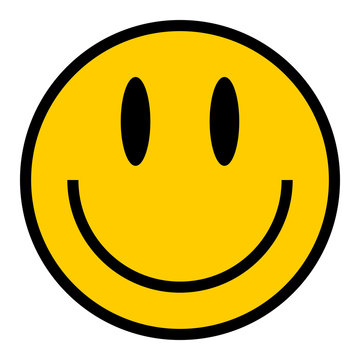

('Positive', <tf.Tensor: shape=(), dtype=float32, numpy=0.801487922668457>)


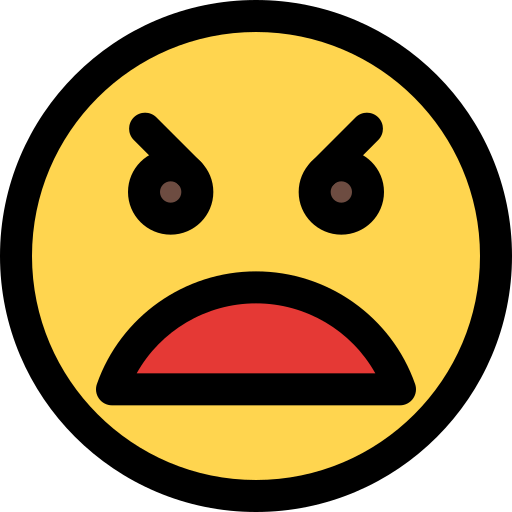

('Negative', <tf.Tensor: shape=(), dtype=float32, numpy=0.23638194799423218>)


In [14]:
# Fonction pour prédire le sentiment d'un texte
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='tf', truncation=True, padding=True, max_length=MAXLEN)
    outputs = model(inputs)
    logits = outputs.logits
    probabilities = tf.nn.softmax(logits, axis=-1)
    predicted_class = tf.argmax(probabilities, axis=-1).numpy()[0]
    from IPython.display import Image, display

    if probabilities[0][1] > 0.5:
      display(Image('/content/smile.jpg',width=100,height=100))
    else:
      display(Image('/content/sad.png',width=100,height=100))
    return "Positive" if predicted_class == 1 else "Negative",probabilities[0][1]

# Exemple de prédiction
text = "the thing that really ? people and this film proves that as the director ? that we can never really be sure of exactly what is round the corner and this helps to ensure that ? actually does manage to be quite frightening the film is memorable for a lot of reasons outside the central plot the characters are all very interesting in their own way and the fact that the book itself almost takes on its own character is very well done anyone worried that the film won't deliver by the end won't be disappointed either as the ending both makes sense and manages to be quite horrifying overall ? is a truly great horror film and one of the best of the decade highly recommended viewingg."
print(predict_sentiment(text))
text = "This movie was absolutely bad! I hated every minute of it."
print(predict_sentiment(text))

In [11]:
decode_review(train_data[10])

"the thing that really ? people and this film proves that as the director ? that we can never really be sure of exactly what is round the corner and this helps to ensure that ? actually does manage to be quite frightening the film is memorable for a lot of reasons outside the central plot the characters are all very interesting in their own way and the fact that the book itself almost takes on its own character is very well done anyone worried that the film won't deliver by the end won't be disappointed either as the ending both makes sense and manages to be quite horrifying overall ? is a truly great horror film and one of the best of the decade highly recommended viewing"